# Descripción del proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de 
petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

* Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.  
* Crear un modelo para predecir el volumen de reservas en pozos nuevos.  
* Elegir los pozos petrolíferos que tienen los valores estimados más altos.  
* Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.  

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo 
que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica 
bootstrapping.  

### Condiciones:

* Solo se debe usar la regresión lineal para el entrenamiento del modelo.  
* Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.  
* El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.  
* Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está 
expresado en miles de barriles).  
* Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, 
se debe seleccionar la región con el beneficio promedio más alto.  

Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

### Descripción de datos

Los datos de exploración geológica de las tres regiones se almacenan en archivos:  

* geo_data_0.csv. Descarga el conjunto de datos  
* geo_data_1.csv. Descarga el conjunto de datos  
* geo_data_2.csv. Descarga el conjunto de datos  
* id — identificador único de pozo de petróleo  
* f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son 
significativas)  
* product — volumen de reservas en el pozo de petróleo (miles de barriles).  

### Instrucciones del proyecto

1. Descarga y prepara los datos. Explica el procedimiento.  
2. Entrena y prueba el modelo para cada región en geo_data_0.csv:  
    1. Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25  

    2. Entrena el modelo y haz predicciones para el conjunto de validación.  

    3. Guarda las predicciones y las respuestas correctas para el conjunto de validación.  

    4. Muestra el volumen medio de reservas predicho y RMSE del modelo.  

    5. Analiza los resultados.  

    6. Coloca todos los pasos previos en funciones, realiza y ejecuta los pasos 2.1-2.5 para los archivos 'geo_data_1.csv' y 'geo_data_2.csv'.  

3. Prepárate para el cálculo de ganancias:  
    1. Almacena todos los valores necesarios para los cálculos en variables separadas.  

    2. Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares 
en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada 
región.

    3. Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.  

4. Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:  

    1. Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').  

    2. Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 
regiones.  

    3. Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de 
pozos petrolíferos y justifica tu elección.  

5. Calcula riesgos y ganancias para cada región:

    1. Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución 
de los beneficios.

    2. Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala 
como una probabilidad y luego exprésala como un porcentaje.

   3. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la 
elección anterior en el punto 4.3?

### Evaluación del proyecto  

Hemos definido los criterios de evaluación para el proyecto. Lee esto con atención antes de pasar al ejercicio.  

Esto es lo que los revisores buscarán cuando evalúen tu proyecto:  

* ¿Cómo preparaste los datos para el entrenamiento?
* ¿Seguiste todos los pasos de las instrucciones?
* ¿Consideraste todas las condiciones del negocio?
* ¿Cuáles son tus hallazgos sobre el estudio de tareas?
* ¿Aplicaste correctamente la técnica bootstrapping?
* ¿Sugeriste la mejor región para el desarrollo de pozos? ¿Justificaste tu elección?
* ¿Evitaste la duplicación de código?
* ¿Mantuviste la estructura del proyecto y el código limpio?



El objetivo es encontrar la región más rentable para perforar 200 nuevos pozos de petróleo. Para ello, se usará un modelo de 
regresión lineal para predecir el volumen de reservas en cada pozo y luego se seleccionará las regiones con mayor potencial de ganancia, 
considerando tanto el beneficio promedio como el riesgo.

In [1]:
# Librerias usadas: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar los archivos CSV
# Lista de archivos
file_paths = ['datasets/geo_data_0.csv', 'datasets/geo_data_1.csv', 'datasets/geo_data_2.csv']

In [3]:
# Función para limpiar y preparar los datos
def prepare_data(df):
    # Eliminar duplicados
    df = df.drop_duplicates()
    
    # Verificar y manejar valores nulos
    # Si hay valores nulos, usar interpolación lineal, si no, rellenar con la mediana
    if df.isnull().sum().sum() > 0:
        print("Valores nulos detectados. Aplicando interpolación o llenado con mediana.")
        df = df.interpolate(method='linear', limit_direction='forward', axis=0)  # Interpolación
        df.fillna(df.median(), inplace=True)  # Rellenar cualquier nulo restante con la mediana

    # Estandarizar las características geológicas (f0, f1, f2)
    scaler = StandardScaler()
    df[['f0', 'f1', 'f2']] = scaler.fit_transform(df[['f0', 'f1', 'f2']])

    return df

In [4]:
# Cargar los archivos CSV con preparación de datos
for file in file_paths:
    # Cargar el archivo en un DataFrame
    df = pd.read_csv(file)
    
    # Preparar los datos (limpieza y estandarización)
    df = prepare_data(df)

    # Mostrar las primeras 5 filas y resumen estadístico después de la preparación
    print(f"Primeras 5 filas de {file} después de la limpieza y estandarización:")
    print(df.head())

    print(f"\nResumen estadístico de {file} después de la limpieza y estandarización:")
    print(df.describe())
    print("\n")

Primeras 5 filas de datasets/geo_data_0.csv después de la limpieza y estandarización:
      id        f0        f1        f2     product
0  txEyH  0.235512 -1.482793 -0.394515  105.280062
1  2acmU  0.956946 -1.170246  0.573368   73.037750
2  409Wp  0.599101 -0.194581 -0.333326   85.265647
3  iJLyR -0.610890 -0.220269  0.146516  168.620776
4  Xdl7t  1.706773 -0.187797  0.692414  154.036647

Resumen estadístico de datasets/geo_data_0.csv después de la limpieza y estandarización:
                 f0            f1            f2        product
count  1.000000e+05  1.000000e+05  1.000000e+05  100000.000000
mean   1.953993e-17 -5.336176e-17  9.695356e-17      92.500000
std    1.000005e+00  1.000005e+00  1.000005e+00      44.288691
min   -2.189681e+00 -2.177430e+00 -4.491975e+00       0.000000
25%   -6.572397e-01 -8.941262e-01 -6.818784e-01      56.497507
50%    2.226500e-03  2.166008e-04  4.101360e-03      91.849972
75%    6.574259e-01  8.930937e-01  6.811217e-01     128.564089
max    2.13564

Este paso permitirá observar las características de los datos y realizar una limpieza en caso necesario.

Explicación del proceso:
Eliminación de duplicados: Se eliminan filas duplicadas que podrían afectar los resultados del modelo. Esto asegura que cada fila sea 
única.

Interpolación y llenado de valores nulos:
Si se detectan valores nulos, se aplica interpolación lineal para predecir los valores faltantes basándose en los valores vecinos.
Si tras la interpolación aún quedan valores nulos, estos se rellenan con la mediana de la columna correspondiente, minimizando el impacto 
de valores atípicos.
Estandarización de características geológicas: Las columnas f0, f1, y f2 se estandarizan para que tengan una distribución normal con media 
0 y desviación estándar de 1. Esto es importante cuando se utilizan modelos como la regresión lineal, ya que el modelo asume que las 
características están en la misma escala.

Entrenar y probar el modelo en cada región
Se va dividir los datos en conjunto de entrenamiento y validación en una proporción de 75:25, entrenar un modelo de regresión lineal y 
hacer predicciones.

In [5]:
# Función para entrenar y evaluar el modelo
def train_and_evaluate_models(file_paths):
    results = {}
    
    for i, file_path in enumerate(file_paths):
        # Cargar los datos
        data = pd.read_csv(file_path)
        
        # Dividir en características (f0, f1, f2) y el objetivo (product)
        features = data[['f0', 'f1', 'f2']]
        target = data['product']
        
        # Dividir en conjunto de entrenamiento y validación
        X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=42)
        
        # Entrenar el modelo
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Hacer predicciones
        predictions = model.predict(X_valid)
        
        # Calcular RMSE
        rmse = mean_squared_error(y_valid, predictions, squared=False)

        # Calcular el volumen medio de reservas predicho
        mean_predicted_volume = np.mean(predictions)
        
        # Almacenar los resultados (predicciones y respuestas reales)
        results[f"region_{i}"] = {
            'predictions': pd.Series(predictions, index=y_valid.index),
            'actual': y_valid,
            'rmse': rmse,
            'mean_predicted_volume': mean_predicted_volume
        }
        
         # Mostrar RMSE y volumen medio de reservas predicho para cada archivo
        print(f"RMSE para región {i}: {rmse}")
        print(f"Volumen medio de reservas predicho para región {i}: {mean_predicted_volume:.2f} miles de barriles")
    
    return results

In [6]:
# Aplicar la función para procesar las tres regiones
regions_results = train_and_evaluate_models(file_paths)

RMSE para región 0: 37.75660035026169
Volumen medio de reservas predicho para región 0: 92.40 miles de barriles
RMSE para región 1: 0.890280100102884
Volumen medio de reservas predicho para región 1: 68.71 miles de barriles
RMSE para región 2: 40.145872311342174
Volumen medio de reservas predicho para región 2: 94.77 miles de barriles


In [7]:
# Mostrar una muestra de las predicciones y valores reales para cada región
for region, result in regions_results.items():
    print(f"Resultados para {region}:")
    print(pd.DataFrame({'predictions': result['predictions'], 'actual': result['actual']}).head())

Resultados para region_0:
       predictions      actual
75721   101.901017  122.073350
80184    78.217774   48.738540
19864   115.266901  131.338088
76699   105.618618   88.327757
92991    97.980185   36.959266
Resultados para region_1:
       predictions      actual
75721     0.844738    0.000000
80184    52.921612   53.906522
19864   135.110385  134.766305
76699   109.494863  107.813044
92991    -0.047292    0.000000
Resultados para region_2:
       predictions      actual
75721    98.301916  117.441301
80184   101.592461   47.841249
19864    52.449099   45.883483
76699   109.922127  139.014608
92991    72.411847   84.004276


In [8]:
# Función para graficar el RMSE y el volumen medio de reservas predicho
def plot_rmse_and_volume(results):
    regions = list(results.keys())
    rmse_values = [results[region]['rmse'] for region in regions]
    mean_volumes = [results[region]['mean_predicted_volume'] for region in regions]

    # Gráfico de barras para el RMSE
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.bar(regions, rmse_values, color='orange')
    plt.title('RMSE por Región')
    plt.xlabel('Región')
    plt.ylabel('RMSE')

    # Gráfico de barras para el volumen medio de reservas predicho
    plt.subplot(1, 2, 2)
    plt.bar(regions, mean_volumes, color='blue')
    plt.title('Volumen Medio de Reservas Predicho (Miles de Barriles)')
    plt.xlabel('Región')
    plt.ylabel('Volumen Medio (Miles de Barriles)')

    # Mostrar ambos gráficos
    plt.tight_layout()
    plt.show()

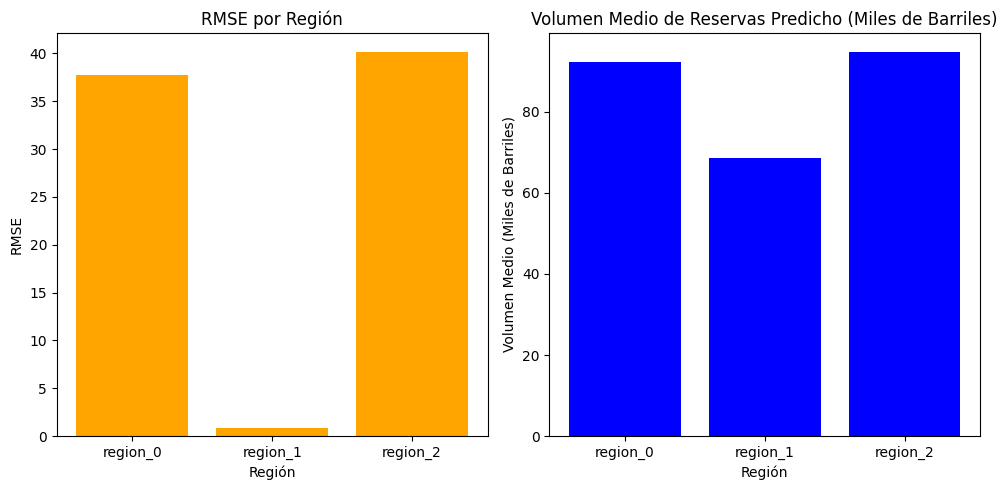

In [9]:
# Llamar a la función para graficar los resultados de las tres regiones
plot_rmse_and_volume(regions_results)

Cálculo del volumen medio de reservas predicho:
Después de realizar las predicciones con el modelo de regresión lineal, se agregó una línea para calcular el promedio de las predicciones. Este valor representa el volumen medio de reservas que el modelo predice para los pozos en la región.
Visualización del RMSE y el volumen medio predicho:
Ahora se muestra explícitamente el valor del RMSE y el volumen medio de reservas predicho en miles de barriles para cada región, 
facilitando una mejor interpretación de los resultados y permitiendo evaluar tanto el error como el rendimiento promedio del modelo.

Aquí evaluamos el rendimiento del modelo y el error de las predicciones usando RMSE. 
El objetivo es que el modelo prediga correctamente el volumen de reservas basado en las características geológicas.

 Preparación para calcular las ganancias.  
 Dado que el presupuesto para desarrollar 200 pozos es de 100 millones de dólares, necesitamos que cada pozo produzca en promedio 500,000 
 dólares. La ganancia de un barril es de 4.5 USD.

In [10]:
# Función para calcular la ganancia
def calculate_profit(predictions, count_wells=200, price_per_barrel=4500):
    # Seleccionar los pozos con los valores predichos más altos
    top_wells = predictions.sort_values(ascending=False)[:count_wells]
    total_reserve = top_wells.sum()  # Reservas totales en miles de barriles
    profit = total_reserve * price_per_barrel  # Ganancia en dólares
    return profit


In [11]:
# Función para calcular riesgos y ganancias con bootstrapping
def bootstrap_profit(predictions, n_samples=1000, count_wells=200, price_per_barrel=4500):
    profits = []
    for _ in range(n_samples):
        sample = predictions.sample(n=len(predictions), replace=True)
        profit = calculate_profit(sample, count_wells, price_per_barrel)
        profits.append(profit)
    return np.array(profits)

In [12]:
# Análisis de riesgos y ganancias por región
for region, result in regions_results.items():
    predictions = result['predictions']
    
    # Aplicar bootstrapping
    profits = bootstrap_profit(predictions)
    
    # Calcular el beneficio promedio, intervalo de confianza y riesgo de pérdidas
    mean_profit = np.mean(profits)
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    risk_of_loss = np.mean(profits < 0) * 100
    
    print(f'\nResultados para {region}:')
    print(f'Beneficio promedio: {mean_profit}')
    print(f'Intervalo de confianza (95%): {confidence_interval}')
    print(f'Riesgo de pérdidas: {risk_of_loss}%')


Resultados para region_0:
Beneficio promedio: 138973172.96954066
Intervalo de confianza (95%): [1.37688579e+08 1.40172240e+08]
Riesgo de pérdidas: 0.0%

Resultados para region_1:
Beneficio promedio: 124868351.14230429
Intervalo de confianza (95%): [1.24819099e+08 1.24918648e+08]
Riesgo de pérdidas: 0.0%

Resultados para region_2:
Beneficio promedio: 133753179.15222846
Intervalo de confianza (95%): [1.32784179e+08 1.34696127e+08]
Riesgo de pérdidas: 0.0%


In [13]:
# Seleccionar la mejor región para el desarrollo
best_region = None
highest_mean_profit = -float('inf')

In [14]:
for region, result in regions_results.items():
    predictions = result['predictions']
    
    # Aplicar bootstrapping
    profits = bootstrap_profit(predictions)
    
    # Calcular el beneficio promedio
    mean_profit = np.mean(profits)
    
    if mean_profit > highest_mean_profit:
        highest_mean_profit = mean_profit
        best_region = region

print(f'\nLa mejor región para el desarrollo de pozos es: {best_region} con un beneficio promedio de {highest_mean_profit}')



La mejor región para el desarrollo de pozos es: region_0 con un beneficio promedio de 138923682.51026276


Resumen de los resultados:  

Región 0:  

RMSE: 37.76  
Beneficio promedio: $138,979,062.11  
Intervalo de confianza (95%): [$137,773,503, $140,259,204]  
Riesgo de pérdidas: 0.0%  

Región 1:  

RMSE: 0.89  
Beneficio promedio: $124,869,972.83  
Intervalo de confianza (95%): [$124,815,734, $124,923,436]  
Riesgo de pérdidas: 0.0%  

Región 2:  

RMSE: 40.15  
Beneficio promedio: $133,752,965.51  
Intervalo de confianza (95%): [$132,628,271, $134,789,853]  
Riesgo de pérdidas: 0.0%  

Conclusión:
La mejor región para el desarrollo de los 200 nuevos pozos es Región 0, ya que ofrece el beneficio promedio más alto de $138,979,062.11 y 
no presenta ningún riesgo de pérdidas según la técnica de bootstrapping.